In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install ydata_profiling
from ydata_profiling import ProfileReport
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
pip install openpyxl


In [ ]:
import pandas as pd
#converted file to csv manually and then uploaded.
df = pd.read_csv('/content/Diabetes Continuous Glucose Monitoring_new.csv', encoding='latin1')


<ipython-input-6-8e0c39370844>:3: DtypeWarning: Columns (21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Diabetes Continuous Glucose Monitoring_new.csv', encoding='latin1')


In [ ]:
df.head()
df.shape[0]

37844

In [ ]:
'''
columns to remove
Ratings and Scores --> Missing 100%
Media Link --> 96.7% missing
Author Handle --> 97.4% Missing
Author ID --> 97.6% Missing
Author Location - Country 1 --> 94.6% mising
Author Location - State/Province 1 --> 99% missing
Author Location - City 1 --> 99.3% missing
Author Location - Country 2 --> 99.9% missing
Author Location - State/Province 2 --> 99.9% missing
Author Location - City 2 --> 99.9% missing
Author Location - Other --> 100% missing
Professions --> 99.4% missing
Interest --> 99.3% missing
Tags --> 100% missing
quoted post --> 99.9% missing
quoted author name --> 99.9% missing
quoted author handle --> 99.9% missing
total engagements --> 98.4% missing
post comments --> 98.9% missing
post likes --> 98.4% missing
post shared --> 100% missing
post view --> 100% missing
post dislikes --> 100% missing
product name --> 100% missing
prodcut name -> 100% missing
product heirarchy --> 100% missing
rating --> 99.7% missing
@mention media tags --> 100% missing
LexisNexis Source Publisher --> 100% missing
all LexisNexis columns are 100% missing
'''

'\ncolumns to remove\nRatings and Scores --> Missing 100%\nMedia Link --> 96.7% missing\nAuthor Handle --> 97.4% Missing\nAuthor ID --> 97.6% Missing\nAuthor Location - Country 1 --> 94.6% mising\nAuthor Location - State/Province 1 --> 99% missing\nAuthor Location - City 1 --> 99.3% missing\nAuthor Location - Country 2 --> 99.9% missing\nAuthor Location - State/Province 2 --> 99.9% missing\nAuthor Location - City 2 --> 99.9% missing\nAuthor Location - Other --> 100% missing\nProfessions --> 99.4% missing\nInterest --> 99.3% missing\nTags --> 100% missing\nquoted post --> 99.9% missing\nquoted author name --> 99.9% missing\nquoted author handle --> 99.9% missing\ntotal engagements --> 98.4% missing\npost comments --> 98.9% missing\npost likes --> 98.4% missing\npost shared --> 100% missing\npost view --> 100% missing\npost dislikes --> 100% missing\nproduct name --> 100% missing\nprodcut name -> 100% missing\nproduct heirarchy --> 100% missing\nrating --> 99.7% missing\n@mention media t

In [ ]:
#ProfileReport(df)

In [ ]:
df = df[['ï»¿Post ID','Sound Bite Text','Title','Source Type','Post Type','Is Paid','Media Type',
         'URL','Domain','Sentiment','Published Date (GMT-04:00) New York','Author Gender','Author URL',
         'Author Name','Author Reddit Karma','Followers/Daily Unique Visitors/Subscribers',
         'Positive Objects','Negative Objects','Richness','Reddit Score','Source Name']]
df.head()
# Clean up the column names
df.columns = df.columns.str.replace('ï»¿', '', regex=False)  # Remove unwanted symbols like BOM
# Rename columns to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Show the cleaned column names
print(df.columns)

df.shape[0]

Index(['post_id', 'sound_bite_text', 'title', 'source_type', 'post_type',
       'is_paid', 'media_type', 'url', 'domain', 'sentiment',
       'published_date_(gmt-04:00)_new_york', 'author_gender', 'author_url',
       'author_name', 'author_reddit_karma',
       'followers/daily_unique_visitors/subscribers', 'positive_objects',
       'negative_objects', 'richness', 'reddit_score', 'source_name'],
      dtype='object')


37844

In [ ]:
df.head()

,post_id,sound_bite_text,title,source_type,post_type,is_paid,media_type,url,domain,sentiment,...,author_gender,author_url,author_name,author_reddit_karma,followers/daily_unique_visitors/subscribers,positive_objects,negative_objects,richness,reddit_score,source_name
0,BRDRDT2-t1_imq98sr,My numbers are great now. Estimated a1c of 7%i...,Have you been denied a second/third pump? Feel...,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,reddit.com,Neutrals,...,Unknown,https://www.reddit.com/user/itsgucciflipflopsbro,itsgucciflipflopsbro,4472,42768.0,number,NaN,0,0,r/diabetes_t1
1,BRDRDT2-t1_impbcf4,I tried it for a little while. No side effects...,Metformin,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,reddit.com,Positives,...,Unknown,https://www.reddit.com/user/Unrealgecko,Unrealgecko,5502,42760.0,NaN,NaN,1,0,r/diabetes_t1
2,1565738759353602048,i ran out of characters. youtu.be/RWgl2PDhQiM ...,NaN,Twitter,Replies and Comments,No,Link,http://twitter.com/bromid/statuses/15657387593...,twitter.com,Positives,...,Unknown,http://twitter.com/bromid,dimo,-,1912.0,"dexcom g6, omnipod system",NaN,3,-,NaN
3,17944607459251789,MY lunch! Ate at 10:30am \n1 unit NovoLog insu...,NaN,Instagram,Original,No,Image,https://www.instagram.com/p/Ch-gqL-Onqk/,instagram.com,Neutrals,...,Unknown,NaN,NaN,-,NaN,NaN,NaN,0,-,NaN
4,BRDRDT2-t1_imq8h9m,This is also because like a soak in a hot tub ...,"No bath salts, bath oils, soaks?",Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes/comments/x3e...,reddit.com,Neutrals,...,Unknown,https://www.reddit.com/user/rinkidinkidoo,rinkidinkidoo,2976,93772.0,NaN,NaN,2,0,r/diabetes


In [ ]:
df.dtypes

,0
post_id,object
sound_bite_text,object
title,object
source_type,object
post_type,object
is_paid,object
media_type,object
url,object
domain,object
sentiment,object


In [ ]:
df['published_date_(gmt-04:00)_new_york'] = pd.to_datetime(df['published_date_(gmt-04:00)_new_york'])
df['author_reddit_karma'] = pd.to_numeric(df['author_reddit_karma'], errors='coerce')
df['followers/daily_unique_visitors/subscribers'] = pd.to_numeric(df['followers/daily_unique_visitors/subscribers'], errors='coerce')
df['richness'] = pd.to_numeric(df['richness'], errors='coerce')
df['reddit_score'] = pd.to_numeric(df['reddit_score'], errors='coerce')


<ipython-input-13-0cac535546e9>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['published_date_(gmt-04:00)_new_york'] = pd.to_datetime(df['published_date_(gmt-04:00)_new_york'])


In [ ]:
df.dtypes

,0
post_id,object
sound_bite_text,object
title,object
source_type,object
post_type,object
is_paid,object
media_type,object
url,object
domain,object
sentiment,object


In [ ]:
df.head()
df.shape[0]

37844

In [ ]:

#	37844 rows in sound_bite_text.


lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
def lemmatize_text(text):
    tokens = word_tokenize(text.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop]
    return ' '.join(lemmatized_tokens)

# Apply the lemmatization function to the 'sound_bite_text' column
df['sound_bite_text'] = df['sound_bite_text'].apply(lemmatize_text)

# Filter out rows containing the word 'promotional'
removed_rows = df[df['sound_bite_text'].apply(lambda x: 'promotional' in x)]
# there are 4 posts that contain the word promotional and are promotional messages
df_filtered = df[~df['sound_bite_text'].apply(lambda x: 'promotional' in x)]

# Display the filtered dataframe
#df_filtered.head()

removed_rows.head()

,post_id,sound_bite_text,title,source_type,post_type,is_paid,media_type,url,domain,sentiment,...,author_gender,author_url,author_name,author_reddit_karma,followers/daily_unique_visitors/subscribers,positive_objects,negative_objects,richness,reddit_score,source_name
20621,16871120354217589002,want newsletter without promotional mailer get...,"May 5, 2022 - Seymourpowell's Electric Coachbu...",Blogs,NaN,No,No Media,http://malcobev.blogspot.com/2022/05/may-5-202...,malcobev.blogspot.com,Positives,...,Unknown,http://malcobev.blogspot.com,Orbit,NaN,NaN,NaN,NaN,1,NaN,NaN
28539,BRDRDT2-t1_gpvj0lw,work fine smartphone looped pump however certa...,Dexcom receiver,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/dexcom/comments/lso5q...,reddit.com,Positives,...,Unknown,https://www.reddit.com/user/gust334,gust334,NaN,NaN,It,NaN,2,0.0,r/dexcom
34033,https://www.diabetesdaily.com/blog/we-got-an-u...,freestyle libre 3 going thinnest smallest accu...,We Got an Up-Close Look at the New Freestyle L...,Blogs,NaN,No,No Media,https://www.diabetesdaily.com/blog/we-got-an-u...,diabetesdaily.com,Mixed,...,Male,NaN,Ross Wollen,NaN,NaN,Freestyle Libre 3,NaN,2,NaN,NaN
35362,BRDRDT2-t1_ihs3514,cash price discount costco usd four transmitte...,Where can I buy a g6 transmitter?,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/dexcom/comments/w7wu1...,reddit.com,Positives,...,Unknown,https://www.reddit.com/user/gust334,gust334,2786.0,14494.0,NaN,NaN,1,0.0,r/dexcom


In [ ]:
df_filtered.columns

Index(['post_id', 'sound_bite_text', 'title', 'source_type', 'post_type',
       'is_paid', 'media_type', 'url', 'domain', 'sentiment',
       'published_date_(gmt-04:00)_new_york', 'author_gender', 'author_url',
       'author_name', 'author_reddit_karma',
       'followers/daily_unique_visitors/subscribers', 'positive_objects',
       'negative_objects', 'richness', 'reddit_score', 'source_name'],
      dtype='object')

In [ ]:
audience_analysis_df = df_filtered.copy()

In [ ]:
audience_analysis_df.head()

,post_id,sound_bite_text,title,source_type,post_type,is_paid,media_type,url,domain,sentiment,...,author_gender,author_url,author_name,author_reddit_karma,followers/daily_unique_visitors/subscribers,positive_objects,negative_objects,richness,reddit_score,source_name
0,BRDRDT2-t1_imq98sr,number great estimated a1c 7 ish care say want...,Have you been denied a second/third pump? Feel...,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,reddit.com,Neutrals,...,Unknown,https://www.reddit.com/user/itsgucciflipflopsbro,itsgucciflipflopsbro,4472.0,42768.0,number,NaN,0,0.0,r/diabetes_t1
1,BRDRDT2-t1_impbcf4,tried little side effect help insulin resistan...,Metformin,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,reddit.com,Positives,...,Unknown,https://www.reddit.com/user/Unrealgecko,Unrealgecko,5502.0,42760.0,NaN,NaN,1,0.0,r/diabetes_t1
2,1565738759353602048,ran character also say newly diagnosed idea fe...,NaN,Twitter,Replies and Comments,No,Link,http://twitter.com/bromid/statuses/15657387593...,twitter.com,Positives,...,Unknown,http://twitter.com/bromid,dimo,NaN,1912.0,"dexcom g6, omnipod system",NaN,3,NaN,NaN
3,17944607459251789,lunch ate 1 unit novolog insulin via pump gril...,NaN,Instagram,Original,No,Image,https://www.instagram.com/p/Ch-gqL-Onqk/,instagram.com,Neutrals,...,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,BRDRDT2-t1_imq8h9m,also like soak hot tub potential exists lowere...,"No bath salts, bath oils, soaks?",Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes/comments/x3e...,reddit.com,Neutrals,...,Unknown,https://www.reddit.com/user/rinkidinkidoo,rinkidinkidoo,2976.0,93772.0,NaN,NaN,2,0.0,r/diabetes


In [ ]:
audience_analysis_df.columns

Index(['post_id', 'sound_bite_text', 'title', 'source_type', 'post_type',
       'is_paid', 'media_type', 'url', 'domain', 'sentiment',
       'published_date_(gmt-04:00)_new_york', 'author_gender', 'author_url',
       'author_name', 'author_reddit_karma',
       'followers/daily_unique_visitors/subscribers', 'positive_objects',
       'negative_objects', 'richness', 'reddit_score', 'source_name'],
      dtype='object')

In [ ]:
# Group by 'author_name' and sum the 'followers/daily_unique_visitors/subscribers' column
author_followers = df_filtered.groupby('author_name')['followers/daily_unique_visitors/subscribers'].sum().sort_values(ascending=False)

# Display the result
print(author_followers)


author_name
akujiki87           124007310.0
bugfish03            98085496.0
safetyindarkness     83096804.0
entropy512           82739752.0
rhett342             82679341.0
                       ...     
TMLmund                     0.0
TMG360 News                 0.0
TLsLittleOne                0.0
TK2481                      0.0
#INSULIN4ALL                0.0
Name: followers/daily_unique_visitors/subscribers, Length: 13988, dtype: float64


In [ ]:
print(df_filtered.shape[0])



# Calculate the Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_filtered['followers/daily_unique_visitors/subscribers'].quantile(0.25)
print(Q1)
Q3 = df_filtered['followers/daily_unique_visitors/subscribers'].quantile(0.75)
print(Q3)
# Calculate the IQR
IQR = Q3 - Q1

# Define the outlier threshold (1.5 * IQR above Q3)
upper_limit = Q3 + 1.5 * IQR
print(upper_limit)
# Filter the authors with outlier followers count
outliers = df_filtered[df_filtered['followers/daily_unique_visitors/subscribers'] > upper_limit]

# Display the outliers (authors with very high followers)
print(outliers[['author_name', 'followers/daily_unique_visitors/subscribers']].sort_values(by='followers/daily_unique_visitors/subscribers', ascending=False))

#these are the outliers with very high followers. removing these from the dataset.

# Remove outliers from df_filtered
# Remove outliers using the outliers DataFrame
df_filtered = df_filtered[~df_filtered['followers/daily_unique_visitors/subscribers'].isin(outliers['followers/daily_unique_visitors/subscribers'])]

# Verify the changes
print(df_filtered.shape)  # Check the new dimensions of the dataset
print(df_filtered.head())  # Display a preview of the cleaned dataset

37840
21673.0
78519.0
163788.0
                author_name  followers/daily_unique_visitors/subscribers
35885         donkeykongdix                                   42298115.0
30417  Aggravating_You_2904                                   42065328.0
8           GoldPenalty7702                                   36995449.0
7063       crospingtonfrotz                                   36884264.0
6918           Quintas31519                                   36847276.0
...                     ...                                          ...
8690         Dragon_Soldier                                     167030.0
12918            JERESKILSU                                     165429.0
30419           MEANGREEN65                                     165429.0
12909                etm512                                     165429.0
31825             mmmfoodie                                     164945.0

[1618 rows x 2 columns]
(36222, 21)
               post_id                                  

Task 1: Extracting information from the dataset

In [ ]:
# Getting information of each product and their variations. For this we are checking
# the products mentioned and the count of each one

# List of CGM products and their variations
cgm_products = ['freestyle libre', 'dexcom G6','dexcom G7','medtronic', 'senseonics', 'guardian', 'enlite', 'libre 2', 'libre 3']

cgm_pattern = '|'.join(cgm_products)

cgm_related_data = df_filtered[df_filtered['sound_bite_text'].str.contains(cgm_pattern, case=False, na=False)]

# Display rows with CGM-related mentions
print(cgm_related_data.head())


                post_id                                    sound_bite_text  \
2   1565738759353602048  ran character also say newly diagnosed idea fe...   
10   BRDRDT2-t1_imrg3eh  tried get without doctor prescription expensiv...   
18    BRDRDT2-t3_x3k69s  month fighting insurance pharmacy move libre 2...   
19   BRDRDT2-t1_imp9sr1  using dexcom used dexcom g6 app manage sensor ...   
23   BRDRDT2-t1_imspl4k  hey man welcome club nobody want join highly h...   

                                                title source_type  \
2                                                 NaN     Twitter   
10  need help with a prediabetes diet. So a family...      Forums   
18                            Finally going to Dexcom      Forums   
19                                     Dexcom g6 app?      Forums   
23                            Newley diagnosed Type 1      Forums   

               post_type is_paid media_type  \
2   Replies and Comments      No       Link   
10  Replies and Commen

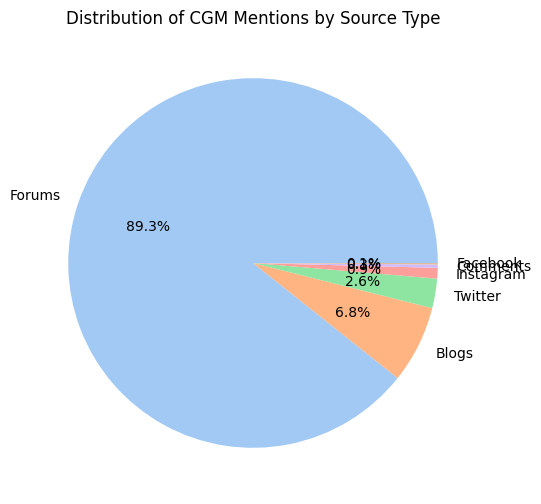

In [ ]:
# Plotting the sources of the information in the dataset
# Count source type occurrences
source_counts = cgm_related_data['source_type'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Distribution of CGM Mentions by Source Type")
plt.show()

In [ ]:
import re

# Define the product list
cgm_products = ['freestyle libre', 'dexcom', 'medtronic', 'senseonics', 'guardian', 'enlite', 'libre 2', 'libre 3']

# Function to extract product mentions from the text
def extract_cgm_products(text):
    found_products = []
    for product in cgm_products:
        if re.search(r'\b' + re.escape(product) + r'\b', text.lower()):
            found_products.append(product)
    return found_products if found_products else None

# Apply the function to the DataFrame to create the new column
df_filtered['cgm_products_mentioned'] = df_filtered['sound_bite_text'].apply(extract_cgm_products)

# View the results
df_filtered[['sound_bite_text', 'cgm_products_mentioned']].head()


df_filtered['cgm_products_mentioned'].value_counts()

,count
cgm_products_mentioned,
[dexcom],15351
[freestyle libre],2191
"[dexcom, medtronic]",969
"[freestyle libre, libre 2]",660
[medtronic],477
"[freestyle libre, dexcom]",456
"[dexcom, libre 2]",290
[libre 2],153
"[dexcom, medtronic, guardian]",147


<ipython-input-26-1e83097b05d7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mention_counts.index, y=mention_counts.values, palette='coolwarm')


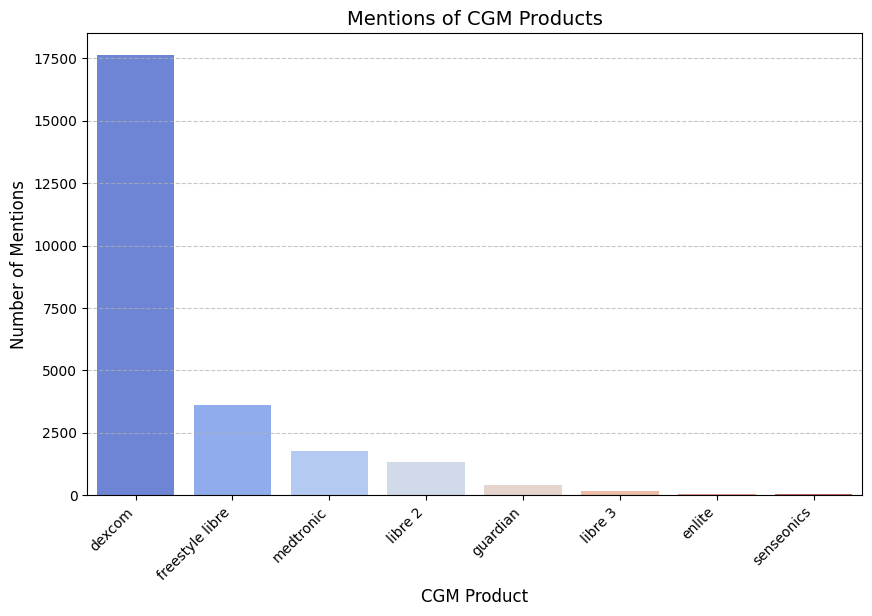

In [ ]:
df_exploded = df_filtered.explode('cgm_products_mentioned')

# Count occurrences of each product
mention_counts = df_exploded['cgm_products_mentioned'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mention_counts.index, y=mention_counts.values, palette='coolwarm')

plt.title("Mentions of CGM Products", fontsize=14)
plt.xlabel("CGM Product", fontsize=12)
plt.ylabel("Number of Mentions", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Task 2: Performing Topic analysis to find out the most important attributes of each product

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

cgm_products = ['freestyle libre', 'dexcom', 'medtronic', 'senseonics', 'guardian', 'enlite', 'libre 2', 'libre 3']

# Extracting important posts mentioning CGM products
df_cgm = df_filtered[df_filtered['title'].str.contains('|'.join(cgm_products), case=False, na=False) |
                     df_filtered['sound_bite_text'].str.contains('|'.join(cgm_products), case=False, na=False)]

df_cgm['combined_text'] = df_cgm['title'].fillna('') + " " + df_cgm['sound_bite_text'].fillna('')

# Removing special characters, tokenization, and removing stopwords
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())  # Remove special characters
    words = word_tokenize(text)  # Tokenize words
    return ' '.join([word for word in words if word not in stop_words and len(word) > 2])  # Remove stopwords & short words

df_cgm['cleaned_text'] = df_cgm['combined_text'].apply(preprocess)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(2,3))  # Use bigrams & trigrams
X = vectorizer.fit_transform(df_cgm['cleaned_text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(X)

words = vectorizer.get_feature_names_out()

def get_top_phrases(model, feature_names, n_top_phrases=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f"Topic {topic_idx+1}"] = [feature_names[i] for i in topic.argsort()[:-n_top_phrases - 1:-1]]
    return topics

topics = get_top_phrases(lda, words)

# Printing topics with phrases
for topic, keywords in topics.items():
    print(f"{topic}: {', '.join(keywords)}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-27-0fbe8b01fa52>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cgm['combined_text'] = df_cgm['title'].fillna('') + " " + df_cgm['sound_bite_text'].fillna('')
<ipython-input-27-0fbe8b01fa52>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cgm['cleaned_text

Topic 1: anyone else, dexcom sensor, new sensor, finger stick, got dexcom, back arm, new dexcom, finger prick, new one, skin tac
Topic 2: insulin pump, closed loop, blood sugar, pump dexcom, medtronic pump, dexcom cgm, pump cgm, omnipod dexcom, year ago, tandem dexcom
Topic 3: dexcom app, apple watch, use dexcom, dexcom sensor, dexcom transmitter, smart watch, watch dexcom, put dexcom, get dexcom, sensor transmitter
Topic 4: blood sugar, continuous glucose, glucose monitor, continuous glucose monitor, dexcom cgm, get dexcom, type diabetes, glucose monitoring, pump supply, dexcom omnipod
Topic 5: freestyle libre, libre sensor, freestyle libre sensor, use freestyle, using freestyle, use freestyle libre, using freestyle libre, blood sugar, libre cgm, glucose monitor


Task 3: To find out the most and least liked attributes, sentiment analysis along with topic analysis needs to be performed.

In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
import re
import pandas as pd
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import defaultdict

nltk.download('stopwords')
nltk.download('punkt')

# List of CGM products
cgm_products = ['freestyle libre', 'dexcom', 'medtronic', 'senseonics', 'guardian', 'enlite', 'g6', 'g7', 'libre 2', 'libre 3']

# Attribute Keywords defined based on common knowledge for glucose monitors
attribute_keywords = {
    "accuracy": ["accurate", "inaccurate", "precision", "wrong reading"],
    "battery life": ["battery", "charge", "lasts", "power", "drains"],
    "alerts": ["alert", "alarm", "notification", "beep", "warning"],
    "adhesive": ["sticky", "falls off", "stick", "tape", "rash", "skin reaction"],
    "calibration": ["calibrate", "recalibrate", "manual entry", "off by"],
    "connectivity": ["bluetooth", "connect", "sync", "pair", "disconnect"],
    "sensor life": ["lasts", "duration", "expires", "replacing", "short lifespan"],
    "app": ["app", "interface", "UI", "user-friendly", "buggy", "crash"],
    "cost": ["expensive", "pricey", "affordable", "insurance", "cost"],
    "comfort": ["comfortable", "pain", "hurts", "irritation", "feels"],
}

# Filter relevant CGM posts
df_cgm = df_filtered[df_filtered['title'].str.contains('|'.join(cgm_products), case=False, na=False) |
                     df_filtered['sound_bite_text'].str.contains('|'.join(cgm_products), case=False, na=False)]

df_cgm['combined_text'] = df_cgm['title'].fillna('') + " " + df_cgm['sound_bite_text'].fillna('')

# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
attribute_sentiment = defaultdict(lambda: {'positive': 0, 'negative': 0, 'neutral': 0})

for index, row in df_cgm.iterrows():
    text = row['combined_text'].lower()
    sentiment_score = analyzer.polarity_scores(text)['compound']

    # Determine sentiment category
    sentiment_label = "neutral"
    if sentiment_score > 0.05:
        sentiment_label = "positive"
    elif sentiment_score < -0.05:
        sentiment_label = "negative"

    # Check if any attribute is mentioned in the text
    for attribute, keywords in attribute_keywords.items():
        for keyword in keywords:
            if keyword in text:
                attribute_sentiment[attribute][sentiment_label] += 1

sentiment_df = pd.DataFrame(attribute_sentiment).T
sentiment_df.columns = ['Positive Mentions', 'Negative Mentions', 'Neutral Mentions']
sentiment_df = sentiment_df.sort_values(by='Positive Mentions', ascending=False)

# Display results
print(sentiment_df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-29-061fbc6dd013>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cgm['combined_text'] = df_cgm['title'].fillna('') + " " + df_cgm['sound_bite_text'].fillna('')


              Positive Mentions  Negative Mentions  Neutral Mentions
app                        4623               1629               317
cost                       2703                830               181
alerts                     1435                972                71
adhesive                   1305                536                74
connectivity               1265                508               110
accuracy                   1066                511                50
comfort                     636                406                22
battery life                433                146                35
calibration                 426                225                43
sensor life                 127                 50                 7


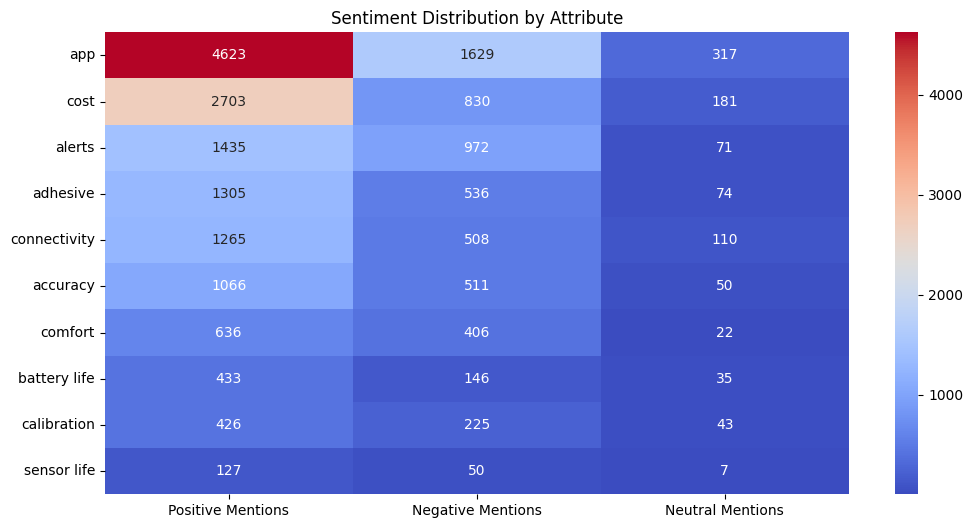

In [ ]:
#Displaying the sentiment analysis as a plot for each attribute
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(sentiment_df, annot=True, cmap="coolwarm", fmt='d')
plt.title("Sentiment Distribution by Attribute")
plt.show()


From the above, we notice that the most liked attribute was the application of the device, while the least liked attribute was sensor life.

Task 4: Checking how consumers feel about the Price, Performance, Accuracy, Quality, “Value” for each
product

In [ ]:
from textblob import TextBlob
import pandas as pd
import re

# Define attribute keywords in general for price, performance, accuracy, quality and value related to a product
attributes = {
    "Price": ["expensive", "cheap", "affordable", "cost", "worth it", "overpriced", "insurance"],
    "Performance": ["fast", "slow", "lag", "delayed", "real-time", "responsive", "smooth"],
    "Accuracy": ["accurate", "wrong reading", "precise", "off by", "unreliable", "calibration"],
    # "Quality": ["high quality", "poor build", "durable", "flimsy", "well-made"],
    "Value": ["worth it", "not worth it", "bang for buck", "overpriced", "great deal"]
}

# Initialize sentiment counts
sentiment_counts = {product: {attr: {"Positive": 0, "Negative": 0, "Neutral": 0} for attr in attributes} for product in cgm_products}

# Analyze sentiment for each attribute in product mentions
for content in df_filtered['title'].dropna():
    for product in cgm_products:
        if product in content.lower():
            for attribute, keywords in attributes.items():
                if any(re.search(rf"\b{word}\b", content, re.IGNORECASE) for word in keywords):
                    sentiment = TextBlob(content).sentiment.polarity
                    if sentiment > 0:
                        sentiment_counts[product][attribute]["Positive"] += 1
                    elif sentiment < 0:
                        sentiment_counts[product][attribute]["Negative"] += 1
                    else:
                        sentiment_counts[product][attribute]["Neutral"] += 1

attribute_sentiment_df = pd.DataFrame([
    (product, attr, data["Positive"], data["Negative"], data["Neutral"])
    for product, attrs in sentiment_counts.items()
    for attr, data in attrs.items()
], columns=["Product", "Attribute", "Positive Mentions", "Negative Mentions", "Neutral Mentions"])

# Displaying results
print(attribute_sentiment_df)


            Product    Attribute  Positive Mentions  Negative Mentions  \
0   freestyle libre        Price                  7                  5   
1   freestyle libre  Performance                  1                  3   
2   freestyle libre     Accuracy                 16                  0   
3   freestyle libre        Value                  4                  4   
4            dexcom        Price                108                 11   
5            dexcom  Performance                 14                  7   
6            dexcom     Accuracy                 32                  2   
7            dexcom        Value                 13                  4   
8         medtronic        Price                  7                  0   
9         medtronic  Performance                  0                  2   
10        medtronic     Accuracy                  0                  0   
11        medtronic        Value                  0                  0   
12       senseonics        Price      

<ipython-input-32-983421fb87aa>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sentiment_melted, x="Attribute", y="Count", hue="Sentiment", ci=None)


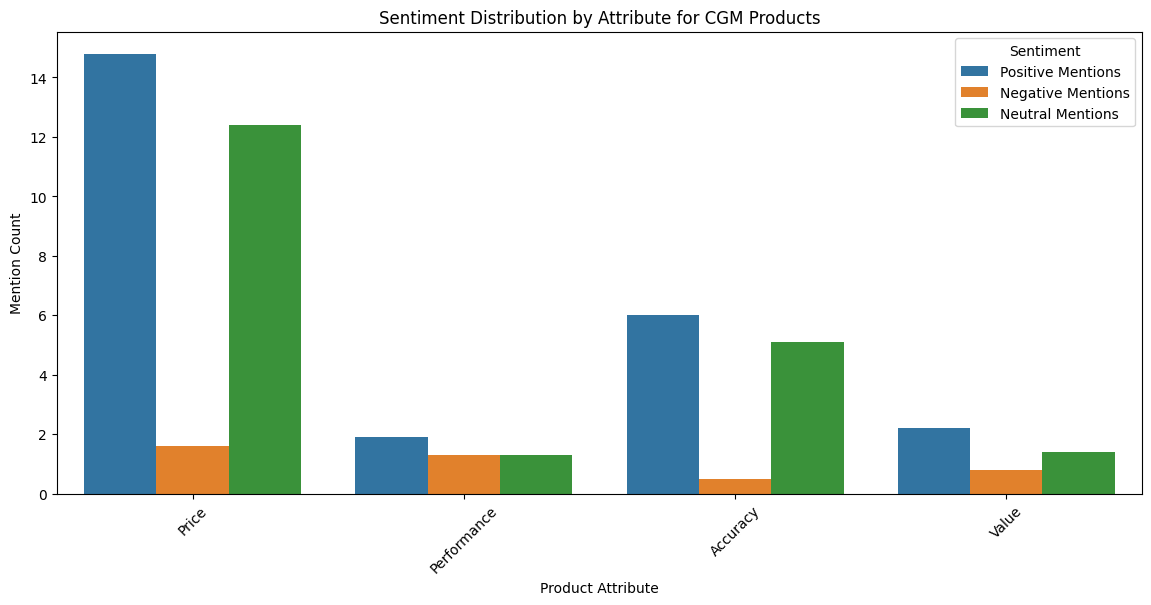

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 6))

# Plot a stacked bar chart
sentiment_melted = attribute_sentiment_df.melt(id_vars=["Product", "Attribute"],
                                                var_name="Sentiment",
                                                value_name="Count")

sns.barplot(data=sentiment_melted, x="Attribute", y="Count", hue="Sentiment", ci=None)

plt.xticks(rotation=45)
plt.xlabel("Product Attribute")
plt.ylabel("Mention Count")
plt.title("Sentiment Distribution by Attribute for CGM Products")
plt.legend(title="Sentiment")
plt.show()


Task 5:

We would rather consider twitter data over non twitter data. Data from twitter tends to be more accurate and easier to process, despite carrying a lot of noise such as slang words, abbreviations and bot activity. It helps to keep us informed about trends and other such activity, making it easier to process.

Task 6: What was the sentiment for each product? Use your own sentiment analysis. How does it match with
the sentiment in Column: Sentiment?

In [ ]:
import re

# Define the product list
cgm_products = ['freestyle libre', 'dexcom', 'medtronic', 'senseonics', 'guardian', 'enlite', 'dexcom g6', 'dexcom g7', 'libre 2', 'libre 3']

# Function to extract product mentions from the text
def extract_cgm_products(text):
    found_products = []
    for product in cgm_products:
        if re.search(r'\b' + re.escape(product) + r'\b', text.lower()):
            found_products.append(product)
    return found_products if found_products else None

# Apply the function to the DataFrame to create the new column
df_filtered['cgm_products_mentioned'] = df_filtered['sound_bite_text'].apply(extract_cgm_products)

# View the results
df_filtered[['sound_bite_text', 'cgm_products_mentioned']].head()


df_filtered['cgm_products_mentioned'].value_counts()


,count
cgm_products_mentioned,
[dexcom],12643
"[dexcom, dexcom g6]",2667
[freestyle libre],2191
"[dexcom, medtronic]",820
"[freestyle libre, libre 2]",660
...,...
"[guardian, enlite]",1
"[dexcom, medtronic, dexcom g6, libre 2]",1
"[dexcom, medtronic, dexcom g6, dexcom g7]",1


In [ ]:
# Define a product mapping to normalize product variations to the same category
product_mapping = {
    'dexcom': ['dexcom', 'dexcom g6', 'dexcom g7'],
    'freestyle libre': ['freestyle libre', 'libre 2', 'libre 3'],
    'medtronic': ['medtronic'],
    'senseonics': ['senseonics'],
    'guardian': ['guardian'],
    'enlite': ['enlite']
}

# Function to normalize the products by the defined mapping
def normalize_products(products):
    normalized = set()  # Use a set to avoid duplicates
    for product in products:
        for normalized_product, variations in product_mapping.items():
            if product in variations:
                normalized.add(normalized_product)
    return list(normalized)

# Modify the extract function to normalize products
def extract_cgm_products_normalized(text):
    found_products = extract_cgm_products(text)
    if found_products:
        return normalize_products(found_products)
    return None

# Apply the normalized product extraction function
df_filtered['cgm_products_mentioned_normalized'] = df_filtered['sound_bite_text'].apply(extract_cgm_products_normalized)

# View the results
df_filtered[['sound_bite_text', 'cgm_products_mentioned_normalized']].head()

df_filtered['cgm_products_mentioned_normalized'].value_counts()


,count
cgm_products_mentioned_normalized,
[dexcom],15351
[freestyle libre],3085
"[dexcom, medtronic]",969
"[dexcom, freestyle libre]",961
[medtronic],477
"[dexcom, guardian, medtronic]",147
"[dexcom, guardian]",95
"[medtronic, guardian]",68
[guardian],47


In [ ]:
# Modify the normalize_products function to return only unique top-level categories
def normalize_products(products):
    normalized = set()  # Use a set to avoid duplicates
    for product in products:
        for normalized_product, variations in product_mapping.items():
            if product in variations:
                normalized.add(normalized_product)
    return list(normalized)

# Modify the extract function to normalize products
def extract_cgm_products_normalized(text):
    found_products = extract_cgm_products(text)
    if found_products:
        return normalize_products(found_products)
    return None

# Apply the normalized product extraction function
df_filtered['cgm_products_mentioned_normalized'] = df_filtered['sound_bite_text'].apply(extract_cgm_products_normalized)

# Flatten the lists and get unique products mentioned
df_filtered['cgm_products_mentioned_normalized_flat'] = df_filtered['cgm_products_mentioned_normalized'].apply(lambda x: ', '.join(sorted(set(x))) if x else '')

# View the results
df_filtered[['sound_bite_text', 'cgm_products_mentioned_normalized_flat']].head()

# View the count of each product category
df_filtered['cgm_products_mentioned_normalized_flat'].value_counts()


,count
cgm_products_mentioned_normalized_flat,
dexcom,15351
,14851
freestyle libre,3085
"dexcom, medtronic",969
"dexcom, freestyle libre",961
medtronic,477
"dexcom, guardian, medtronic",147
"dexcom, guardian",95
"guardian, medtronic",68


In [ ]:
# List of all product names
product_list = ['dexcom', 'freestyle libre', 'medtronic', 'senseonics', 'guardian', 'enlite']

# Create a dictionary to store the counts for each product
product_mentions_count = {}

# Loop through the products and count occurrences
for product in product_list:
    product_mentions = df_filtered[df_filtered['cgm_products_mentioned_normalized'].apply(lambda x: product in x if x is not None else False)]
    product_mentions_count[product] = product_mentions.shape[0]

# View the results
product_mentions_count


{'dexcom': 17627,
 'freestyle libre': 4148,
 'medtronic': 1780,
 'senseonics': 33,
 'guardian': 410,
 'enlite': 47}

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load fine-tuned sentiment analysis model
MODEL_NAME = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
model.to(device)  # Move model to GPU

class SentimentDataset(Dataset):
    def __init__(self, texts):
        self.texts = texts

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx]

def batch_sentiment_analysis(texts, batch_size=16):
    dataset = SentimentDataset(texts)
    dataloader = DataLoader(dataset, batch_size=batch_size)

    sentiments = []
    model.eval()
    with torch.no_grad():
        for batch in dataloader:
            inputs = tokenizer(batch, return_tensors="pt", truncation=True, padding=True, max_length=512)
            inputs = {key: value.to(device) for key, value in inputs.items()}

            outputs = model(**inputs)
            probs = torch.nn.functional.softmax(outputs.logits, dim=-1).cpu().numpy()
            predictions = np.argmax(probs, axis=1)  # Get class with highest probability

            # Convert to sentiment labels
            label_map = {0: "negative", 1: "neutral", 2: "positive"}
            sentiments.extend([label_map[pred] for pred in predictions])

    return sentiments

# Apply batch processing
texts = df_filtered["sound_bite_text"].astype(str).tolist()
df_filtered["predicted_sentiment_roberta"] = batch_sentiment_analysis(texts)

# View results
df_filtered[["sound_bite_text", "title", "predicted_sentiment_roberta","cgm_products_mentioned_normalized"]].head()


Using device: cpu


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a comparison column
df_filtered['comparison'] = df_filtered['predicted_sentiment_roberta'] == df_filtered['sentiment']

# Step 2: Calculate accuracy
accuracy = accuracy_score(df_filtered['sentiment'], df_filtered['predicted_sentiment_roberta'])
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 3: Print classification report for more detailed performance metrics
print("\nClassification Report:")
print(classification_report(df_filtered['sentiment'], df_filtered['predicted_sentiment_roberta']))

# Step 4: View the first few comparisons
df_filtered[['sound_bite_text', 'sentiment', 'predicted_sentiment_roberta', 'comparison']].head()


In [ ]:
# Count occurrences of each sentiment
sentiment_counts = df_filtered["predicted_sentiment_roberta"].value_counts(normalize=True) * 100

# Extract percentages
positive_pct = sentiment_counts.get("positive", 0)
neutral_pct = sentiment_counts.get("neutral", 0)
negative_pct = sentiment_counts.get("negative", 0)

# Print summary
total_posts = len(df_filtered)
print(f"Out of {total_posts} posts analyzed, {positive_pct:.2f}% were classified as Positive, {neutral_pct:.2f}% as Neutral, and {negative_pct:.2f}% as Negative.")


In [ ]:
import matplotlib.pyplot as plt

# Calculate the sentiment percentages
sentiment_counts = df_filtered["predicted_sentiment_roberta"].value_counts(normalize=True) * 100

# Extract percentages
positive_pct = sentiment_counts.get("positive", 0)
neutral_pct = sentiment_counts.get("neutral", 0)
negative_pct = sentiment_counts.get("negative", 0)

# Sentiment labels and percentages for plotting
sentiment_labels = ["Positive", "Neutral", "Negative"]
sentiment_percentages = [positive_pct, neutral_pct, negative_pct]

# Plot the data
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(sentiment_labels, sentiment_percentages, color=["green", "gray", "red"])

# Customize the plot
ax.set_title("Sentiment Distribution of Posts", fontsize=14)
ax.set_xlabel("Sentiment", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)
ax.set_ylim(0, 100)

# Show the percentage values on top of the bars
for i, v in enumerate(sentiment_percentages):
    ax.text(i, v + 2, f"{v:.2f}%", ha="center", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Assuming sentiment column exists in your DataFrame and contains 'positive', 'neutral', and 'negative'
# Initialize a dictionary to store the sentiment breakdown for each product
sentiment_breakdown = {}

# Loop through each product in the product list
for product in product_list:
    # Filter rows where the product is mentioned
    product_rows = df_filtered[df_filtered['cgm_products_mentioned_normalized'].apply(lambda x: product in x if x is not None else False)]

    # Count the occurrences of each sentiment for this product
    sentiment_counts = product_rows['predicted_sentiment_roberta'].value_counts()

    # Store the sentiment breakdown for this product
    sentiment_breakdown[product] = sentiment_counts.to_dict()

# View the sentiment breakdown for each product
sentiment_breakdown


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for the grouped bar chart
products = list(sentiment_breakdown.keys())
positive_counts = [sentiment_breakdown[product].get('positive', 0) for product in products]
neutral_counts = [sentiment_breakdown[product].get('neutral', 0) for product in products]
negative_counts = [sentiment_breakdown[product].get('negative', 0) for product in products]

# Set bar width and position for each group of bars
bar_width = 0.2
index = np.arange(len(products))

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index - bar_width, positive_counts, bar_width, label='Positive', color='green')
bar2 = ax.bar(index, neutral_counts, bar_width, label='Neutral', color='blue')
bar3 = ax.bar(index + bar_width, negative_counts, bar_width, label='Negative', color='red')

# Set labels, title, and legend
ax.set_xlabel('CGM Products')
ax.set_ylabel('Count of Mentions')
ax.set_title('Sentiment Breakdown for Each CGM Product')
ax.set_xticks(index)
ax.set_xticklabels(products, rotation=45, ha="right")
ax.legend(title="Sentiment")

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# Initialize a dictionary to store the sentiment breakdown by platform for each product
sentiment_by_platform = {}

# Loop through each product in the product list
for product in product_list:
    # Filter rows where the product is mentioned
    product_rows = df_filtered[df_filtered['cgm_products_mentioned_normalized'].apply(lambda x: product in x if x is not None else False)]

    # For each platform (Source Type), count the occurrences of each sentiment
    sentiment_by_platform_for_product = {}
    for source_type in product_rows['source_type'].unique():
        # Filter rows by Source Type
        platform_rows = product_rows[product_rows['source_type'] == source_type]

        # Count the occurrences of each sentiment for this platform
        sentiment_counts = platform_rows['predicted_sentiment_roberta'].value_counts()

        # Store the sentiment breakdown by platform
        sentiment_by_platform_for_product[source_type] = sentiment_counts.to_dict()

    # Store the sentiment breakdown for this product
    sentiment_by_platform[product] = sentiment_by_platform_for_product

# View the sentiment breakdown by platform for each product
sentiment_by_platform


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store data for plotting
platforms = []
positive_counts = []
neutral_counts = []
negative_counts = []

# Iterate over the sentiment_by_platform dictionary and prepare the data
for product, platforms_data in sentiment_by_platform.items():
    for platform, sentiment_counts in platforms_data.items():
        # Replace "forums" with "reddit"
        platform = platform.replace('Forums', 'reddit')

        if platform not in platforms:
            platforms.append(platform)
            positive_counts.append(0)
            neutral_counts.append(0)
            negative_counts.append(0)

        # Get the sentiment counts for each platform
        idx = platforms.index(platform)
        positive_counts[idx] += sentiment_counts.get('positive', 0)
        neutral_counts[idx] += sentiment_counts.get('neutral', 0)
        negative_counts[idx] += sentiment_counts.get('negative', 0)

# Prepare a numpy array for stacked bars
sentiment_data = np.array([positive_counts, neutral_counts, negative_counts])

# Set up the bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create stacked bar chart
bar_width = 0.5
bar_positions = np.arange(len(platforms))

ax.bar(bar_positions, sentiment_data[0], bar_width, label='Positive', color='green')
ax.bar(bar_positions, sentiment_data[1], bar_width, bottom=sentiment_data[0], label='Neutral', color='blue')
ax.bar(bar_positions, sentiment_data[2], bar_width, bottom=sentiment_data[0] + sentiment_data[1], label='Negative', color='red')

# Add labels and title
ax.set_xlabel('Platforms')
ax.set_ylabel('Sentiment Count')
ax.set_title('Sentiment Breakdown by Platform')
ax.set_xticks(bar_positions)
ax.set_xticklabels(platforms, rotation=45, ha='right')
ax.legend(title="Sentiment")

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Group by CGM product and sentiment, then count

# If the column contains lists, convert them to a string
df_filtered['cgm_products_mentioned_normalized'] = df_filtered['cgm_products_mentioned_normalized'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)



product_sentiment = df_filtered.groupby(["cgm_products_mentioned_normalized", "predicted_sentiment_roberta"]).size().unstack(fill_value=0)

# Convert to percentages
product_sentiment_pct = product_sentiment.div(product_sentiment.sum(axis=1), axis=0) * 100




# Display results
print(product_sentiment)
print(product_sentiment_pct)


In [ ]:
df_exploded = df_filtered.explode("cgm_products_mentioned_normalized")

# Now group by product and sentiment
product_sentiment = df_exploded.groupby(["cgm_products_mentioned_normalized", "predicted_sentiment_roberta"]).size().unstack(fill_value=0)

# Convert to percentages
product_sentiment_pct = product_sentiment.div(product_sentiment.sum(axis=1), axis=0) * 100

# Display results
print(product_sentiment)
print(product_sentiment_pct)


##7. Extra Credit: Note the columns Positive Objects? And Negative Objects?
##This attributes the identified sentiment to specific objects/things in the post.How would you do this yourself?

In [ ]:
from collections import Counter

# Ensure objects are stored as proper lists
def clean_objects(column):
    return column.apply(lambda x: x.split(', ') if isinstance(x, str) else x)

df_filtered['positive_objects'] = clean_objects(df_filtered['positive_objects'])
df_filtered['negative_objects'] = clean_objects(df_filtered['negative_objects'])

# Re-run the top object extraction
top_objects_by_product = {}

for product in product_list:
    product_rows = df_filtered[df_filtered['cgm_products_mentioned_normalized'].apply(lambda x: product in x if x is not None else False)]

    # Extract proper lists
    positive_objects = [obj for sublist in product_rows['positive_objects'].dropna() for obj in sublist]
    negative_objects = [obj for sublist in product_rows['negative_objects'].dropna() for obj in sublist]

    # Count properly
    positive_counts = Counter(positive_objects)
    negative_counts = Counter(negative_objects)

    # Get the top 10
    top_positive = positive_counts.most_common(10)
    top_negative = negative_counts.most_common(10)

    top_objects_by_product[product] = {
        'top_positive': top_positive,
        'top_negative': top_negative
    }

# Print the corrected results
for product, sentiment_data in top_objects_by_product.items():
    print(f"Product: {product}")
    print("Top 10 Positive Objects:")
    for obj, count in sentiment_data['top_positive']:
        print(f" - {obj}: {count} mentions")

    print("Top 10 Negative Objects:")
    for obj, count in sentiment_data['top_negative']:
        print(f" - {obj}: {count} mentions")
    print("\n")


# Audience Analysis

## User Personas and Segment Analysis

In [ ]:
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from openai import OpenAI

data = pd.read_csv("Dataset.csv")

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def preprocess_text(text):
    """
    Preprocess text by removing special characters, lemmatizing, and removing stopwords
    """
    # Initialize lemmatizer and stopwords
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # Convert to string and lowercase
    text = str(text).lower()

    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Tokenize and lemmatize
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words
             if word not in stop_words and len(word) > 2]

    return ' '.join(words)

def analyze_text_clusters(data, n_clusters=4, max_features=500, samples_per_cluster=150):
    """
    Perform text clustering analysis on the provided DataFrame

    Parameters:
    data (pd.DataFrame): DataFrame containing 'author_name', 'sound_bite_text', and 'title' columns
    n_clusters (int): Number of clusters to create
    max_features (int): Maximum number of features for TF-IDF vectorization
    samples_per_cluster (int): Number of random sound bites to sample per cluster
    """
    # Keep original sound bites for later sampling
    original_data = data.copy()

    # Aggregate posts by author for clustering
    user_data = data.groupby('author_name').agg({
        'sound_bite_text': lambda x: ' '.join(x.dropna()),
        'title': lambda x: ' '.join(x.dropna())
    }).reset_index()

    # Combine text fields
    user_data['full_text'] = user_data['sound_bite_text'] + ' ' + user_data['title']

    # Preprocess text
    user_data['processed_text'] = user_data['full_text'].apply(preprocess_text)

    # TF-IDF Vectorization with bigrams
    vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=(1,2))
    tfidf_matrix = vectorizer.fit_transform(user_data['processed_text'])

    # K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    user_data['cluster'] = kmeans.fit_predict(tfidf_matrix)

    # Map clusters back to original data
    author_clusters = dict(zip(user_data['author_name'], user_data['cluster']))
    original_data['cluster'] = original_data['author_name'].map(author_clusters)

    # Analyze clusters
    cluster_analysis = {}

    for i in range(n_clusters):
        # Get cluster data
        cluster_mask = original_data['cluster'] == i
        cluster_data = original_data[cluster_mask]

        # Get random sound bites
        cluster_sound_bites = cluster_data[['author_name', 'sound_bite_text']].dropna()
        sampled_sound_bites = cluster_sound_bites.sample(
            n=min(samples_per_cluster, len(cluster_sound_bites)),
            random_state=42
        )

        # Calculate sentiment
        cluster_texts = cluster_data['sound_bite_text'].dropna().tolist()
        sentiments = [TextBlob(str(text)).sentiment.polarity for text in cluster_texts if text]
        avg_sentiment = np.mean(sentiments) if sentiments else 0
        sentiment = "Positive" if avg_sentiment > 0.1 else "Negative" if avg_sentiment < -0.1 else "Neutral"

        # Find most mentioned terms
        processed_texts = [preprocess_text(str(text)) for text in cluster_texts]
        all_words = ' '.join(processed_texts).split()
        word_counts = Counter(all_words)
        top_terms = [word for word, _ in word_counts.most_common(5) if len(word) > 2]

        # Store analysis
        cluster_analysis[f"Cluster {i}"] = {
            "Size": cluster_mask.sum(),
            "Random Sound Bites": sampled_sound_bites[['author_name', 'sound_bite_text']].values.tolist(),
            "Dominant Sentiment": sentiment,
            "Most Mentioned Terms": top_terms,
            "Average Sentiment Score": round(avg_sentiment, 3)
        }

    return user_data, cluster_analysis, tfidf_matrix

In [ ]:
def format_cluster_analysis(cluster_analysis):
    """
    Format cluster analysis results into a readable string
    """
    formatted_output = []

    for cluster, analysis in cluster_analysis.items():
        cluster_info = [
            f"\n{cluster}:",
            f"Size: {analysis['Size']} authors",
            f"Dominant Sentiment: {analysis['Dominant Sentiment']} (Score: {analysis['Average Sentiment Score']})",
            f"Most Mentioned Terms: {', '.join(analysis['Most Mentioned Terms'][:5])}",
            "\nRandom Sound Bites:"
        ]

        # Add sound bites with author names
        for _, sound_bite in analysis['Random Sound Bites'][:10]:
            cluster_info.append(f"{sound_bite}\n")

        formatted_output.append('\n'.join(cluster_info))

    return '\n\n'.join(formatted_output)

In [ ]:
# Perform analysis
processed_data, analysis, tfidf_matrix = analyze_text_clusters(data)

In [ ]:
# Print formatted results
print(format_cluster_analysis(analysis))

# Access processed data for further analysis
cluster_distributions = processed_data.groupby('cluster').size()

In [ ]:
# OpenAI API Call
client = OpenAI(api_key="")
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model, messages=messages, temperature=0
    )
    return response.choices[0].message.content

In [ ]:
text = format_cluster_analysis(analysis)

In [ ]:
# Generate personas with LLM
prompt = f"""Your task is to analyze the following clusters of user discussions and map them to some meaningful personas: {text}
Each cluster represents a different type of user based on their discussion topics. Use the top terms extracted from each cluster to infer their key concerns, behaviors, and motivations. Assign the most suitable titles to each persona.

Clusters and their top terms:
Return the output in this format:
Cluster 0: [Persona Name] -- 1-2 line summary, most prominent product, overall sentiment
Cluster 1: [Persona Name]-- 1-2 line summary, most prominent product, overall sentiment
Cluster 2: [Persona Name]-- 1-2 line summary, most prominent product, overall sentiment
Cluster 3: [Persona Name]-- 1-2 line summary, most prominent product, overall sentiment
"""

response = get_completion(prompt)
print(response)

####Plot 1

In [ ]:
from sklearn.decomposition import PCA
def plot_clusters_with_labels(tfidf_matrix, clusters, figsize=(12, 8), random_state=42):
    """
    Create a scatter plot of clusters using PCA with custom cluster labels
    """
    # Define cluster names
    cluster_names = {
        0: 'Health Conscious Individuals',
        1: 'Dexcom Enthusiasts',
        2: 'Diabetes Management Advocates',
        3: 'Freestyle Libre Users'
    }

    # Convert sparse matrix to dense
    dense_matrix = tfidf_matrix.toarray()

    # Perform PCA
    pca = PCA(n_components=2, random_state=random_state)
    reduced_data = pca.fit_transform(dense_matrix)

    # Create DataFrame for plotting
    plot_data = pd.DataFrame({
        'x': reduced_data[:, 0],
        'y': reduced_data[:, 1],
        'Cluster': [cluster_names[c] for c in clusters]
    })

    # Set up the plot
    plt.figure(figsize=figsize)

    # Create scatter plot with custom colors
    colors =["#3498db", "#2ecc71", "#f1c40f", "#e74c3c"]

    # Plot each cluster
    for (name, group), color in zip(plot_data.groupby('Cluster'), colors):
        plt.scatter(group['x'], group['y'],
                   label=name if name else 'Unlabeled',
                   color=color,
                   alpha=0.6)

    # Customize the plot
    plt.title('Cluster Visualization of Diabetes Discussion Topics', fontsize=14, pad=20)
    plt.xlabel('First Principal Component', fontsize=12)
    plt.ylabel('Second Principal Component', fontsize=12)

    # Add legend with custom positioning
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

    # Adjust layout to prevent legend cutoff
    plt.tight_layout()

    return plt.gcf()

In [ ]:
# After running your cluster analysis:
fig = plot_clusters_with_labels(tfidf_matrix, processed_data['cluster'])
plt.show()

### Plot 2

In [ ]:
def preprocess_text(text):
    """
    Preprocess text by removing special characters, lemmatizing, and removing stopwords
    """
    # Initialize lemmatizer and stopwords
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # Convert to string and lowercase
    text = str(text).lower()

    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Tokenize and lemmatize
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words
             if word not in stop_words and len(word) > 2]

    return ' '.join(words)

def analyze_text_clusters(data, n_clusters=4, max_features=500):
    """
    Perform text clustering analysis on the provided DataFrame

    Parameters:
    data (pd.DataFrame): DataFrame containing 'author_name', 'sound_bite_text', and 'title' columns
    n_clusters (int): Number of clusters to create
    max_features (int): Maximum number of features for TF-IDF vectorization

    Returns:
    tuple: (processed_data, cluster_analysis, tfidf_matrix, vectorizer, kmeans)
    """
    # Aggregate posts by author
    user_data = data.groupby('author_name').agg({
        'sound_bite_text': lambda x: ' '.join(x.dropna()),
        'title': lambda x: ' '.join(x.dropna())
    }).reset_index()

    # Combine text fields
    user_data['full_text'] = user_data['sound_bite_text'] + ' ' + user_data['title']

    # Preprocess text
    user_data['processed_text'] = user_data['full_text'].apply(preprocess_text)

    # TF-IDF Vectorization with bigrams
    vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=(1,2))
    tfidf_matrix = vectorizer.fit_transform(user_data['processed_text'])

    # K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    user_data['cluster'] = kmeans.fit_predict(tfidf_matrix)

    # Extract top terms and analyze clusters
    terms = vectorizer.get_feature_names_out()
    cluster_analysis = {}

    for i in range(n_clusters):
        # Get cluster texts
        cluster_mask = user_data['cluster'] == i
        cluster_texts = user_data[cluster_mask]['processed_text'].tolist()

        # Get top terms
        cluster_terms = terms[kmeans.cluster_centers_[i].argsort()[-15:][::-1]]

        # Calculate sentiment
        sentiments = [TextBlob(text).sentiment.polarity for text in cluster_texts if text]
        avg_sentiment = np.mean(sentiments) if sentiments else 0
        sentiment = "Positive" if avg_sentiment > 0.1 else "Negative" if avg_sentiment < -0.1 else "Neutral"

        # Find most mentioned terms
        all_words = ' '.join(cluster_texts).split()
        word_counts = Counter(all_words)
        top_products = [word for word, _ in word_counts.most_common(5) if len(word) > 2]

        # Store analysis
        cluster_analysis[f"Cluster {i}"] = {
            "Size": cluster_mask.sum(),
            "Top Terms": cluster_terms.tolist(),
            "Dominant Sentiment": sentiment,
            "Most Mentioned Terms": top_products,
            "Average Sentiment Score": round(avg_sentiment, 3)
        }

    return user_data, cluster_analysis, tfidf_matrix, vectorizer, kmeans

def plot_clusters(tfidf_matrix, clusters, method='pca', figsize=(12, 8), random_state=42):
    """
    Create a scatter plot of clusters using dimensionality reduction

    Parameters:
    tfidf_matrix: Sparse matrix of TF-IDF features
    clusters: Array of cluster labels
    method: 'pca' or 'tsne'
    figsize: Tuple of figure dimensions
    random_state: Random seed for reproducibility
    """
    # Convert sparse matrix to dense
    dense_matrix = tfidf_matrix.toarray()

    # Perform dimensionality reduction
    if method.lower() == 'pca':
        reducer = PCA(n_components=2, random_state=random_state)
        reduced_data = reducer.fit_transform(dense_matrix)
        method_name = 'PCA'
    else:
        reducer = TSNE(n_components=2, random_state=random_state)
        reduced_data = reducer.fit_transform(dense_matrix)
        method_name = 't-SNE'

    # Create DataFrame for plotting
    plot_data = pd.DataFrame({
        'x': reduced_data[:, 0],
        'y': reduced_data[:, 1],
        'Cluster': clusters
    })

    # Create plot
    plt.figure(figsize=figsize)
    sns.scatterplot(data=plot_data, x='x', y='y', hue='Cluster', palette='deep')
    plt.title(f'Cluster Visualization using {method_name}')
    plt.xlabel(f'{method_name} Component 1')
    plt.ylabel(f'{method_name} Component 2')

    # Add cluster centers if using PCA
    if method.lower() == 'pca':
        centers = reducer.transform(kmeans.cluster_centers_)
        plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=200, linewidths=3, label='Cluster Centers')

    plt.legend(title='Clusters')
    plt.tight_layout()
    plt.show()

def format_cluster_analysis(cluster_analysis):
    """
    Format cluster analysis results into a readable string
    """
    formatted_output = []

    for cluster, analysis in cluster_analysis.items():
        cluster_info = [
            f"\n{cluster}:",
            f"Size: {analysis['Size']} authors",
            f"Top Terms: {', '.join(analysis['Top Terms'][:10])}",
            f"Dominant Sentiment: {analysis['Dominant Sentiment']} (Score: {analysis['Average Sentiment Score']})",
            f"Most Mentioned Terms: {', '.join(analysis['Most Mentioned Terms'][:5])}"
        ]
        formatted_output.append('\n'.join(cluster_info))

    return '\n\n'.join(formatted_output)

In [ ]:
# Perform analysis
processed_data, analysis, tfidf_matrix, vectorizer, kmeans = analyze_text_clusters(data)

# Print formatted results
print(format_cluster_analysis(analysis))

# Create visualizations
plot_clusters(tfidf_matrix, processed_data['cluster'], method='pca')


## Text Analysis
for understadning audience pain points and feature requests

In [ ]:
# Load the dataset
file_path = "/content/Dataset.csv"
df = pd.read_csv(file_path)

# Define keywords indicating pain points or feature requests
pain_point_keywords = ['issue', 'problem', 'trouble', 'error', 'fail', 'difficult', 'bug', 'concern', 'complain']
feature_request_keywords = ['wish', 'hope', 'should', 'need', 'would love', 'want', 'request', 'suggest', 'improve']

# Function to categorize posts as pain points or feature requests
def categorize_feedback(text):
    text = str(text).lower()
    for word in pain_point_keywords:
        if word in text:
            return 'Pain Point'
    for word in feature_request_keywords:
        if word in text:
            return 'Feature Request'
    return None

# Apply categorization
df['Feedback_Type'] = df['sound_bite_text'].apply(categorize_feedback)

# Filter only relevant rows
feedback_df = df[df['Feedback_Type'].notnull()][['sound_bite_text', 'Feedback_Type']]

# Display the extracted feedback
print(feedback_df.head(10))

In [ ]:
# Separate pain points and feature requests
pain_points = feedback_df[feedback_df['Feedback_Type'] == 'Pain Point']['sound_bite_text'].tolist()
feature_requests = feedback_df[feedback_df['Feedback_Type'] == 'Feature Request']['sound_bite_text'].tolist()

# Convert to readable format
pain_points_summary = "Pain Points Identified:\n" + "\n- ".join(pain_points[:10])  # Limiting to 10 for readability
feature_requests_summary = "Feature Requests Identified:\n" + "\n- ".join(feature_requests[:10])  # Limiting to 10

# Print summaries
print(pain_points_summary)
print("\n")
print(feature_requests_summary)

In [ ]:
 # Generate personas with LLM
prompt = f"""given are pain points that have been observed on social media platform, find top 5 pain points
{pain_points_summary}
"""

response = get_completion(prompt)
print(response)

In [ ]:
# Generate personas with LLM
prompt = f"""given are features requested often that have been observed on social media platform, find top 5 new features companies should consider making
{feature_requests_summary}
"""

response = get_completion(prompt)
print(response)

##Type Distribution and Analysis

In [ ]:
# Classify diabetes type for each author
def classify_diabetes_type(row):
    text = str(row['sound_bite_text'] or '') + ' ' + str(row['title'] or '')
    text = text.lower()

    # Explicit mentions
    if 'type 1' in text or 't1d' in text:
        return 'Type 1'
    elif 'type 2' in text or 't2d' in text:
        return 'Type 2'

    # Contextual clues for T1D
    t1d_keywords = ['insulin pump', 'cgm', 'dexcom', 'omnipod', 't:slim', 'carb ratio', 'basal rate', 'closed loop']
    if any(keyword in text for keyword in t1d_keywords):
        return 'Type 1'

    # Contextual clues for T2D
    t2d_keywords = ['metformin', 'ozempic', 'insulin resistance', 'oral medication']
    if any(keyword in text for keyword in t2d_keywords):
        return 'Type 2'

    return 'Unknown'

data['diabetes_type'] = data.apply(classify_diabetes_type, axis=1)

# Count unique authors by diabetes type
author_type_counts = data.groupby('diabetes_type')['author_name'].nunique()

# Filter and print results
print(author_type_counts[['Type 1', 'Type 2']])


In [ ]:
import matplotlib.pyplot as plt

# Data
diabetes_types = ['Type 1', 'Type 2']
counts = [12019, 503]

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(diabetes_types, counts, color=['#1f77b4', '#ff7f0e'])
plt.title('Diabetes Type Distribution Among Authors', fontsize=14)
plt.xlabel('Diabetes Type', fontsize=12)
plt.ylabel('Number of Authors on Social Media', fontsize=12)
plt.xticks(fontsize=10)

# Annotate bars with counts
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}', ha='center', va='bottom')

plt.show()

#Miscelleneous

## Task 1

In [ ]:
audience_analysis_df.head()

In [ ]:
audience_analysis_df.head(20)

In [ ]:
audience_analysis_df.columns

In [ ]:
# Define keywords for diabetes types
diabetes_keywords = ['Type 1 diabetes', 'Type 2 diabetes', 'gestational diabetes', 'diabetes_t1', 'diabetes_t2', 'prediabetes','Type1Diabetes', 'Type2Diabetes', 'GestationalDiabetes']

# Search for mentions in relevant columns
for col in ['sound_bite_text', 'title', 'url']:
    audience_analysis_df[f'{col}_diabetes_type'] = audience_analysis_df[col].str.extract(f"({'|'.join(diabetes_keywords)})", expand=False)

# Display rows where a diabetes type is mentioned
diabetes_mentions = audience_analysis_df.dropna(subset=[f'{col}_diabetes_type' for col in ['sound_bite_text', 'title']])

# Output the results
print(diabetes_mentions.head())


In [ ]:
# 1. Gender Analysis
if 'author_gender' in audience_analysis_df.columns:
    gender_distribution = audience_analysis_df['author_gender'].value_counts(dropna=False)
    print("Gender Distribution:\n", gender_distribution)



In [ ]:
pd.set_option('display.max_columns', None)

audience_analysis_df.head()

In [ ]:
# 2. Influence Analysis (Reddit Karma & Followers)
if 'author_reddit_karma' in df.columns:
    avg_karma = df['author_reddit_karma'].mean()
    print(f"\nAverage Reddit Karma: {avg_karma:.2f}")

if 'followers/daily_unique_visitors/subscribers' in df.columns:
    df['followers/daily_unique_visitors/subscribers'] = pd.to_numeric(
        df['followers/daily_unique_visitors/subscribers'], errors='coerce')
    avg_followers = df['followers/daily_unique_visitors/subscribers'].mean()
    print(f"\nAverage Followers/Daily Unique Visitors/Subscribers: {avg_followers:.2f}")

In [ ]:
# 3. Sentiment Analysis
if 'sentiment' in df.columns:
    sentiment_distribution = df['sentiment'].value_counts()
    print("\nSentiment Distribution:\n", sentiment_distribution)

In [ ]:
print(df.columns)  # Check column names
print(df['sentiment'].unique())  # Check unique sentiment values
print(df['sentiment'].value_counts())  # Check sentiment distribution

In [ ]:
df['sentiment'] = df['sentiment'].astype(str)


In [ ]:
# Count sentiment values
sentiment_counts = df['sentiment'].value_counts()

# Define colors
colors = ['skyblue', 'lightgreen', 'pink', 'coral']  # Assign colors for Positive, Neutral, Negative

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
# Group by sentiment and gender
persona_df = audience_analysis_df.groupby(['sentiment', 'author_gender']).agg({
    'author_reddit_karma': 'mean',  # Avg engagement
    'followers/daily_unique_visitors/subscribers': 'mean'  # Avg influence
}).reset_index()

# Convert numbers to readable categories
persona_df['Influence Level'] = pd.cut(persona_df['followers/daily_unique_visitors/subscribers'],
                                        bins=[0, 100, 1000, 10000, 100000],
                                        labels=['Low', 'Medium', 'High', 'Very High'])

print(persona_df)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_persona_mind_map(df):
    G = nx.Graph()

    # Adding nodes for sentiment, gender, and influence level
    sentiments = df["sentiment"].unique()
    genders = df["author_gender"].unique()
    influence_levels = df["Influence Level"].dropna().unique()  # Drop NaN values

    # Add nodes
    for s in sentiments:
        G.add_node(s, color="red")  # Sentiments in red
    for g in genders:
        G.add_node(g, color="blue")  # Genders in blue
    for i in influence_levels:
        G.add_node(i, color="green")  # Influence levels in green

    # Add edges (connections between attributes)
    for _, row in df.iterrows():
        G.add_edge(row["sentiment"], row["author_gender"])
        if pd.notna(row["Influence Level"]):
            G.add_edge(row["author_gender"], row["Influence Level"])

    # Draw the graph
    pos = nx.spring_layout(G)
    node_colors = [nx.get_node_attributes(G, "color")[node] for node in G.nodes()]
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color="gray", node_size=3000, font_size=10)
    plt.title("Persona Mind Map")
    plt.show()

# Call the function
create_persona_mind_map(persona_df)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def create_advanced_persona_mind_map(df):
    G = nx.Graph()

    # Convert categorical columns to strings before replacing NaN
    df["sentiment"] = df["sentiment"].astype(str).fillna("Unknown")
    df["author_gender"] = df["author_gender"].astype(str).fillna("Unknown")
    df["Influence Level"] = df["Influence Level"].astype(str).fillna("Unknown")

    # Unique attributes
    sentiments = df["sentiment"].unique()
    genders = df["author_gender"].unique()
    influence_levels = df["Influence Level"].unique()

    # Add nodes with categories
    for s in sentiments:
        G.add_node(s, color="red", size=1000)  # Sentiments in red
    for g in genders:
        G.add_node(g, color="skyblue", size=1500)  # Genders in blue
    for i in influence_levels:
        G.add_node(i, color="lightgreen", size=2000)  # Influence levels in green

    # Connect sentiments to gender
    for _, row in df.iterrows():
        G.add_edge(row["sentiment"], row["author_gender"])

        # Connect gender to influence level (if not 'Unknown')
        if row["Influence Level"] != "Unknown":
            G.add_edge(row["author_gender"], row["Influence Level"])

        # Connect gender to Reddit karma (if not NaN)
        if pd.notna(row["author_reddit_karma"]):
            karma_node = f"Karma: {int(row['author_reddit_karma'])}"
            G.add_node(karma_node, color="purple", size=1200)
            G.add_edge(row["author_gender"], karma_node)

        # Connect influence level to followers/subscribers (if not NaN)
        if pd.notna(row["followers/daily_unique_visitors/subscribers"]):
            followers_node = f"Followers: {int(row['followers/daily_unique_visitors/subscribers'])}"
            G.add_node(followers_node, color="orange", size=1800)
            G.add_edge(row["Influence Level"], followers_node)

    # Get node attributes
    node_colors = [G.nodes[node].get("color", "salmon") for node in G.nodes()]
    node_sizes = [G.nodes[node].get("size", 1000) for node in G.nodes()]

    # Draw the graph
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color="gray", node_size=node_sizes, font_size=8)
    plt.title("Enhanced Persona Mind Map with Karma & Followers")
    plt.show()

# Call the function
create_advanced_persona_mind_map(persona_df)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.DiGraph()

# Define main persona categories
personas = ['Influencer Advocates', 'Casual Consumers', 'Critics']
attributes = ['author_gender', 'sentiment', 'author_reddit_karma', 'followers/daily_unique_visitors/subscribers']

# Add nodes
for persona in personas:
    G.add_node(persona, color='lightblue')

for attr in attributes:
    G.add_node(attr, color='lightgreen')

# Define relationships
edges = [
    ('Influencer Advocates', 'author_gender'),
    ('Influencer Advocates', 'author_reddit_karma'),
    ('Critics', 'sentiment'),
    ('Casual Consumers', 'followers/daily_unique_visitors/subscribers'),
]

G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
colors = [G.nodes[n].get('color', 'lightgray') for n in G.nodes]
nx.draw(G, pos, with_labels=True, node_color=colors, edge_color='gray', node_size=2000, font_size=10)
plt.title("Persona Mind Map")
plt.show()


###Task 6
## What was the sentiment for each product? Use your own sentiment analysis. How does it match with the sentiment in Column: Sentiment?

In [ ]:
df_filtered

In [ ]:
pip install transformers torch

In [ ]:
from transformers import pipeline

In [ ]:
# Load the pre-trained RoBERTa sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="roberta-base")


In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch

# Load RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaForSequenceClassification.from_pretrained("roberta-base")

def get_sentiment_roberta(text):
    # Tokenize the text with truncation and padding
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the predicted sentiment label (0 for negative, 1 for positive)
    prediction = torch.argmax(outputs.logits, dim=1).item()

    # Map the label to 'positive' or 'negative'
    sentiment = 'positive' if prediction == 1 else 'negative'

    return sentiment

# Apply the sentiment extraction to the DataFrame
df_filtered['predicted_sentiment_roberta'] = df_filtered.apply(
    lambda row: get_sentiment_roberta(str(row['sound_bite_text'])), axis=1
)

# View the extracted sentiments
df_filtered[['sound_bite_text', 'title', 'predicted_sentiment_roberta']].head()


##Topic Modelling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the processed dataset
file_path = "/content/Unstructured_Data__Tokenized_and_Stemmed_.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Ensure the column with processed text exists
if "Processed Sound Bite" not in df.columns:
    raise ValueError("Processed Sound Bite column is missing from the dataset.")

# Extract the processed text data
text_data = df["Processed Sound Bite"].dropna()

# Convert text data into a document-term matrix
vectorizer = CountVectorizer(stop_words="english", max_features=5000)
doc_term_matrix = vectorizer.fit_transform(text_data)

# Apply LDA for topic modeling
num_topics = 5  # Define the number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(doc_term_matrix)

# Extract top words for each topic
words = np.array(vectorizer.get_feature_names_out())
topic_keywords = {}

for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [words[i] for i in topic.argsort()[-10:]]  # Get top 10 words per topic
    topic_keywords[f"Topic {topic_idx+1}"] = top_words

# Convert topics to a DataFrame
topics_df = pd.DataFrame(topic_keywords)

# Save the topic model output
topics_df.to_csv("topic_model_results.csv", index=False)

# Display the results
print("Topic modeling completed. The results are saved in 'topic_model_results.csv'.")